In [1]:
# Import des librairies

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Pour le clustering

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.manifold import TSNE

# Pour le dendograme et l'agglomerative Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

# Pour le DBScan

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('data_ready')

data

,Unnamed: 0,customer_unique_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,monetary,review_score,wait_time,expected_wait_time,delay_vs_expected,last_purchase_timestamp,first_purchase_timestamp,frequency,time_on_olist,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,129.90,12.00,141.90,5.0,6 days 09:52:10,10 days 13:03:33,0.0,2018-05-10 10:56:27,2018-05-10 10:56:27,1,0 days 00:00:00,111
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00,18.90,8.29,27.19,4.0,3 days 06:51:15,7 days 12:48:33,0.0,2018-05-07 11:11:27,2018-05-07 11:11:27,1,0 days 00:00:00,114
2,2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00,69.00,17.22,86.22,3.0,25 days 17:33:44,27 days 02:54:57,0.0,2017-03-10 21:05:03,2017-03-10 21:05:03,1,0 days 00:00:00,536
3,3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00,25.99,17.63,43.62,4.0,20 days 00:53:24,31 days 03:30:19,0.0,2017-10-12 20:29:41,2017-10-12 20:29:41,1,0 days 00:00:00,320
4,4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00,180.00,16.89,196.89,5.0,13 days 03:23:14,20 days 04:14:18,0.0,2017-11-14 19:45:42,2017-11-14 19:45:42,1,0 days 00:00:00,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00,1570.00,497.42,2067.42,5.0,27 days 12:21:24,54 days 02:59:24,0.0,2017-06-08 21:00:36,2017-06-08 21:00:36,1,0 days 00:00:00,446
93354,93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00,64.89,19.69,84.58,4.0,30 days 02:20:24,32 days 03:52:04,0.0,2017-12-10 20:07:56,2017-12-10 20:07:56,1,0 days 00:00:00,261
93355,93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00,89.90,22.56,112.46,5.0,14 days 20:55:48,44 days 08:10:44,0.0,2017-02-07 15:49:16,2017-02-07 15:49:16,1,0 days 00:00:00,567
93356,93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00,115.00,18.69,133.69,5.0,11 days 20:36:45,25 days 08:42:19,0.0,2018-05-02 15:17:41,2018-05-02 15:17:41,1,0 days 00:00:00,118


In [3]:
# On commence par utiliser les features du RFM pour le K_means

liste = ['recency','frequency','monetary']#,'review_score','delay_vs_expected']

# X = pd.DataFrame(scaler.fit_transform(data[liste].dropna())).sample(frac=0.3)

# minmax = pd.DataFrame(scaler.fit_transform(data[liste].dropna()))

standard = StandardScaler()
standard.fit(data[liste].dropna())

X_original = data[liste].dropna()

X_100 = pd.DataFrame(standard.transform(data[liste].dropna()),columns=data[liste].dropna().columns)

X = X_100.sample(frac=0.3,random_state=0)

In [4]:
inertias = []
silouhette = []
ARI = []
ks = range(2,10)
for k in ks:
    km_test = KMeans(n_clusters=k,random_state=42).fit(X)
    inertias.append(km_test.inertia_)
    silouhette.append(silhouette_score(X,km_test.labels_))

In [5]:
# On cherche le bon nombre de cluster

Text(0.5, 0, 'k cluster number')

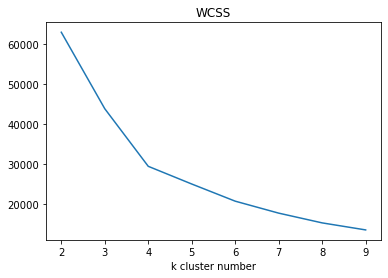

In [6]:
plt.plot(ks, inertias)
plt.title('WCSS')
plt.xlabel('k cluster number')

Text(0.5, 0, 'k cluster number')

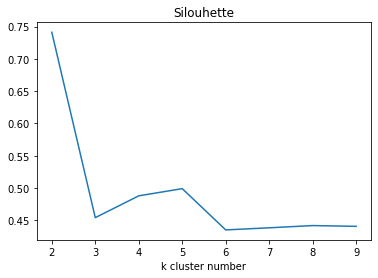

In [7]:
plt.plot(ks, silouhette)
plt.title('Silouhette')
plt.xlabel('k cluster number')

In [8]:
y_pred = KMeans(n_clusters=5, random_state=0).fit(X).predict(X_100)

print("Nombre de cluster : 5")
print(np.array(np.unique(y_pred,return_counts=True)))
print('Pourcentage :')
print((np.array(np.unique(y_pred,return_counts=True))[1]/len(X_100)*100).round(2),"\n")

y_pred = KMeans(n_clusters=4, random_state=0).fit(X).predict(X_100)

print("Nombre de cluster : 4")
print(np.array(np.unique(y_pred,return_counts=True)))
print('Pourcentage :')
print((np.array(np.unique(y_pred,return_counts=True))[1]/len(X_100)*100).round(2),"\n")

y_pred = KMeans(n_clusters=3, random_state=0).fit(X).predict(X_100)

print("Nombre de cluster : 3")
print(np.array(np.unique(y_pred,return_counts=True)))
print('Pourcentage :')
print((np.array(np.unique(y_pred,return_counts=True))[1]/len(X_100)*100).round(2),"\n")

# On voit que dans 5 , il y a un cluster très petit qui donne peu d'information. On va donc prendre 4 cluster


Nombre de cluster : 5
[[    0     1     2     3     4]
 [49564 36075  2777  4397   545]]
Pourcentage :
[53.09 38.64  2.97  4.71  0.58] 

Nombre de cluster : 4
[[    0     1     2     3]
 [37190 51019  2376  2773]]
Pourcentage :
[39.84 54.65  2.55  2.97] 

Nombre de cluster : 3
[[    0     1     2]
 [52273 38273  2812]]
Pourcentage :
[55.99 41.    3.01] 



In [9]:
# On va tester la stabilité

X_6 = X_100.sample(frac=0.6,random_state=0)
X_5 = X_100.sample(frac=0.5,random_state=0)


y_pred_60 = KMeans(n_clusters=4, random_state=0).fit(X_6)
y_pred_50 = KMeans(n_clusters=4, random_state=0).fit(X_5)

adjusted_rand_score(np.array(y_pred_60.predict(X_100)),np.array(y_pred_50.predict(X_100)))

C:\Users\Louis\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
C:\Users\Louis\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


0.9535757184578115

In [10]:
# 4 Semble être un bon nombre de cluster

y_pred = KMeans(n_clusters=4, random_state=0).fit(X).predict(X_100[liste])

X_100['label'] = y_pred

X_original['label'] = y_pred

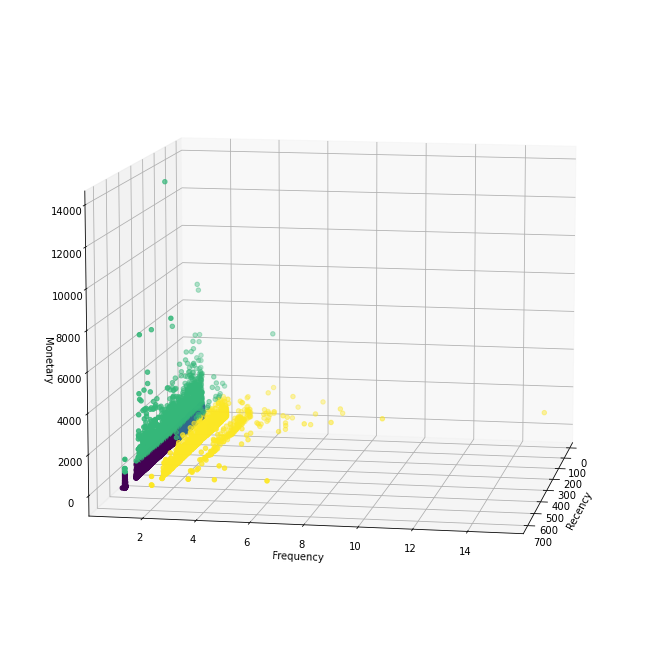

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=10, azim=10)

ax.scatter(X_original['recency'],X_original['frequency'],X_original['monetary'],c=y_pred);

In [12]:
X_1 = X_100.sample(frac=0.1)

X_embedded = TSNE(n_components=2, perplexity=40, n_iter=1000).fit_transform(X_1[liste])

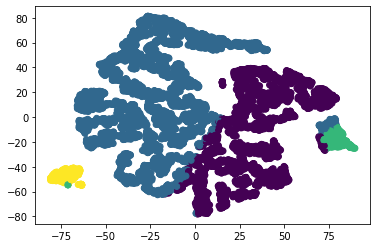

In [13]:
plt.scatter(pd.DataFrame(X_embedded)[0],pd.DataFrame(X_embedded)[1],c=X_1['label'] )

In [14]:
# Etudions les valeurs RFM par Features

for i in np.sort(X_original['label'].unique()):
    print(f'Feature {i}')
    print(X_original[X_original['label']==i][liste].mean(),'\n')

Feature 0
recency      387.666389
frequency      1.000000
monetary     133.836406
dtype: float64 

Feature 1
recency      128.010329
frequency      1.000000
monetary     134.461731
dtype: float64 

Feature 2
recency       237.268939
frequency       1.012626
monetary     1169.229545
dtype: float64 

Feature 3
recency      219.396682
frequency      2.114317
monetary     290.012759
dtype: float64 



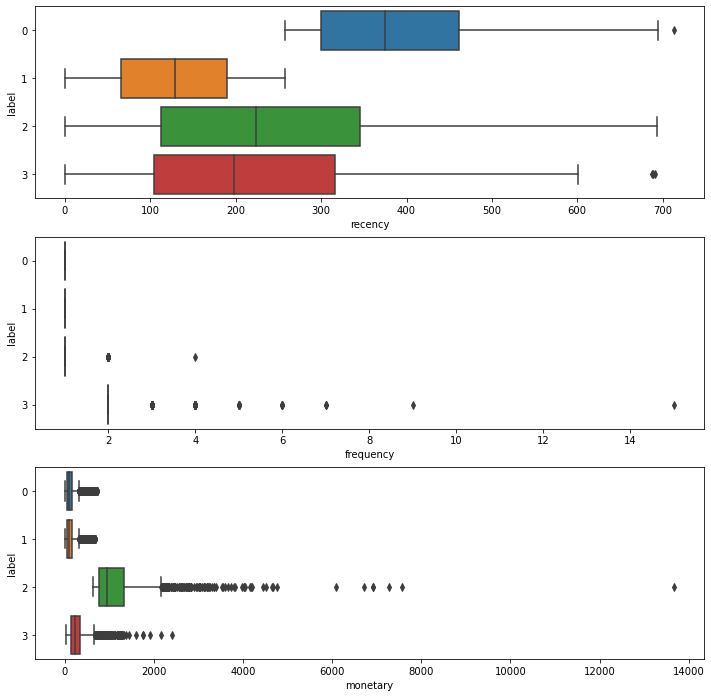

In [15]:
# On fait un boxplot pour vérifier la répartitions

fig, axs = plt.subplots(len(liste), 1, figsize=(12,12))

j=0

for i in liste:
    #axs[j].set_title(i)
    sns.boxplot(x=X_original[i],y=X_original['label'],orient='h',ax=axs[j])
    j+=1

# K_mean with more features

In [16]:
# On fait de même en rajoutant le review score

liste_full = ['recency','frequency','monetary','review_score']#,'delay_vs_expected']

standard = StandardScaler()
standard.fit( data[liste_full].dropna())

X_full_original = data[liste_full].dropna()

X_full_100 = pd.DataFrame(standard.transform(data[liste_full].dropna()),columns=data[liste_full].dropna().columns)

X_full_3 = X_full_100.sample(frac=0.3,random_state=0)

inertias_full = []
silouhette_full = []

ks = range(2,10)
for k in ks:
    km_test_full = KMeans(n_clusters=k,random_state=0).fit(X_full_3)
    inertias_full.append(km_test_full.inertia_)
    silouhette_full.append(silhouette_score(X_full_3,km_test_full.labels_))


Text(0.5, 0, 'k cluster number')

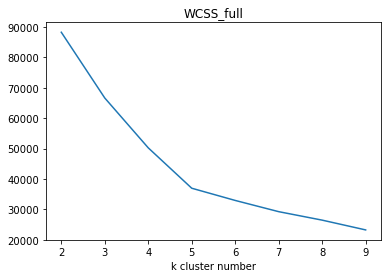

In [17]:
plt.plot(ks, inertias_full)
plt.title('WCSS_full')
plt.xlabel('k cluster number')

Text(0.5, 0, 'k cluster number')

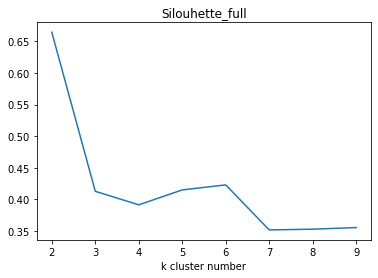

In [18]:
plt.plot(ks, silouhette_full)
plt.title('Silouhette_full')
plt.xlabel('k cluster number')

In [19]:
y_pred_full = KMeans(n_clusters=5, random_state=0).fit(X_full_3).predict(X_full_100)

print(5)
print(np.array(np.unique(y_pred_full,return_counts=True)))

y_pred_full = KMeans(n_clusters=4, random_state=0).fit(X_full_3).predict(X_full_100)

print(4)
print(np.array(np.unique(y_pred_full,return_counts=True)))

y_pred_full = KMeans(n_clusters=3, random_state=0).fit(X_full_3).predict(X_full_100)

print(3)
print(np.array(np.unique(y_pred_full,return_counts=True)))

# On prend 5 clusters.

5
[[    0     1     2     3     4]
 [15653  2763 31304 40974  2061]]
4
[[    0     1     2     3]
 [ 2796 32056 41969 15934]]
3
[[    0     1     2]
 [70931 19027  2797]]


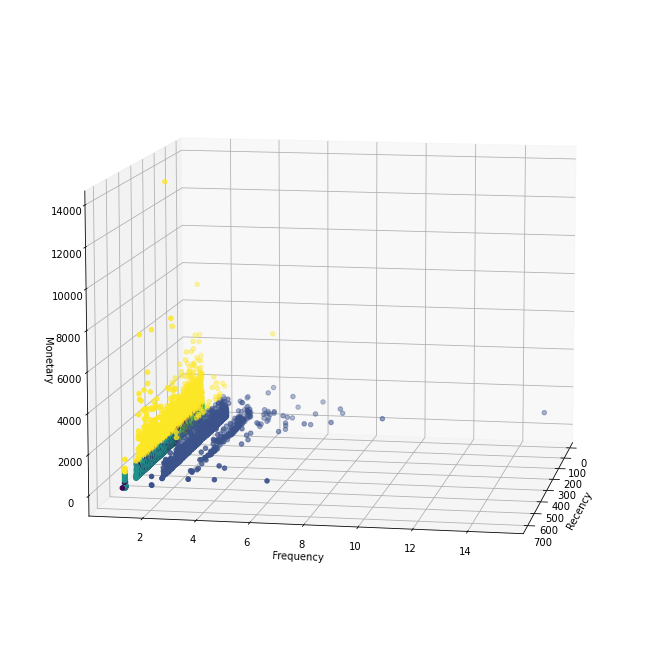

In [20]:
y_pred_full = KMeans(n_clusters=5, random_state=0).fit(X_full_3).predict(X_full_100[liste_full])

#X_full_100['label'] = y_pred_full

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=10, azim=10)

ax.scatter(X_full_original['recency'],X_full_original['frequency'],X_full_original['monetary'],c=y_pred_full);

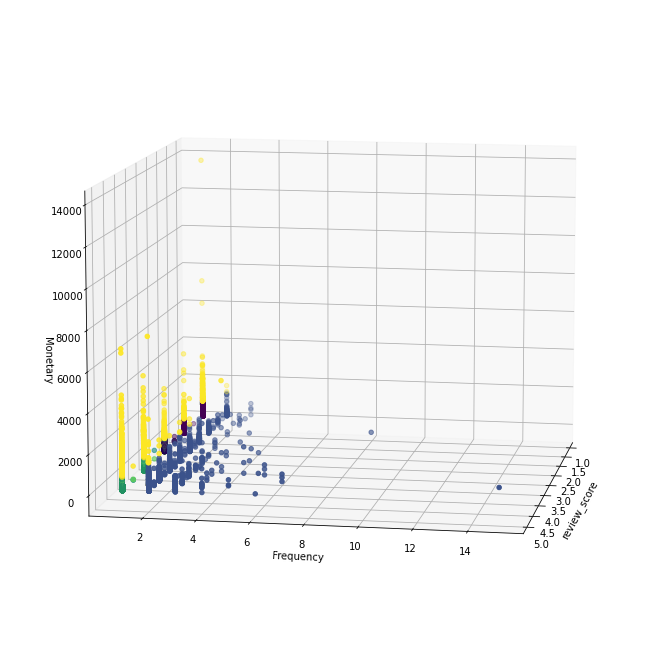

In [21]:

y_pred_full = KMeans(n_clusters=5, random_state=0).fit(X_full_3).predict(X_full_100[liste_full])

#X_full_100['label'] = y_pred_full

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('review_score')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=10, azim=10)

ax.scatter(X_full_original['review_score'],X_full_original['frequency'],X_full_original['monetary'],c=y_pred_full);

In [22]:
X_full_100['label'] = y_pred_full
X_full_original['label'] = y_pred_full

for i in np.sort(X_full_original['label'].unique()):
    print(f'Feature {i}')
    print(X_full_original[X_full_original['label']==i][liste_full].mean(),'\n')

Feature 0
recency         230.045678
frequency         1.000000
monetary        150.224871
review_score      1.733150
dtype: float64 

Feature 1
recency         219.171553
frequency         2.114730
monetary        289.141886
review_score      4.205254
dtype: float64 

Feature 2
recency         392.411257
frequency         1.000000
monetary        133.545201
review_score      4.641547
dtype: float64 

Feature 3
recency         121.664373
frequency         1.000000
monetary        132.421267
review_score      4.705167
dtype: float64 

Feature 4
recency          236.151383
frequency          1.015041
monetary        1232.823649
review_score       4.092431
dtype: float64 



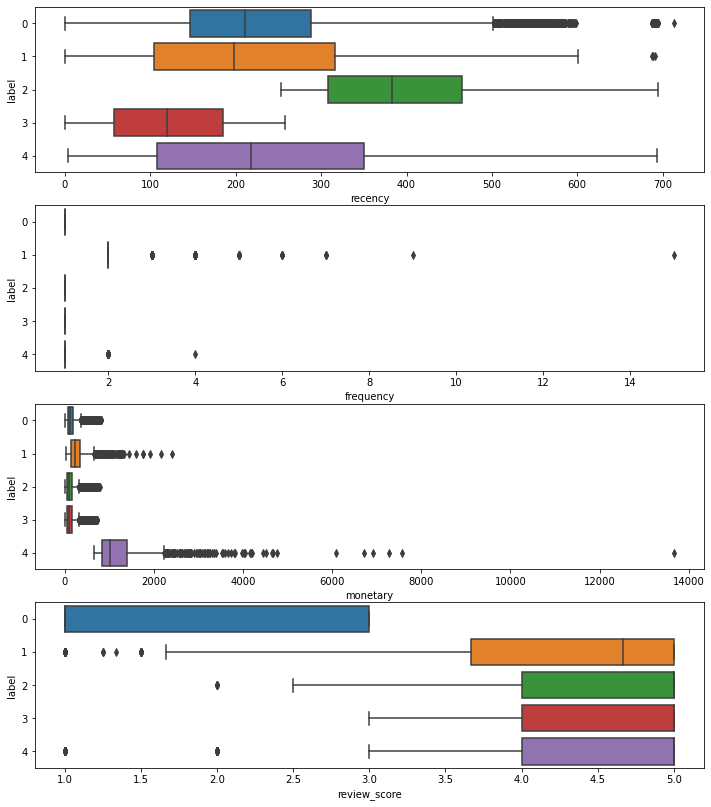

In [23]:
# On fait un boxplot pour vérifier la répartitions

fig, axs = plt.subplots(len(liste_full), 1, figsize=(12,14))

j=0

for i in liste_full:
    #axs[j].set_title(i)
    sns.boxplot(x=X_full_original[i],y=X_full_original['label'],orient='h',ax=axs[j])
    j+=1

In [24]:
X_full_1 =X_full_100.sample(frac=0.1)

X_full_embedded = TSNE(n_components=2, perplexity=40, n_iter=1000).fit_transform(X_full_1[liste_full])

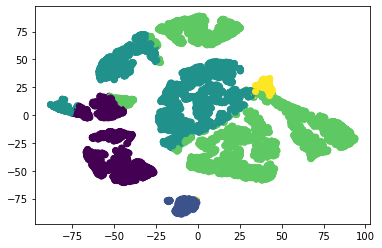

In [25]:
plt.scatter(pd.DataFrame(X_full_embedded)[0],pd.DataFrame(X_full_embedded)[1],c=X_full_1['label'] )

# CAH clustering

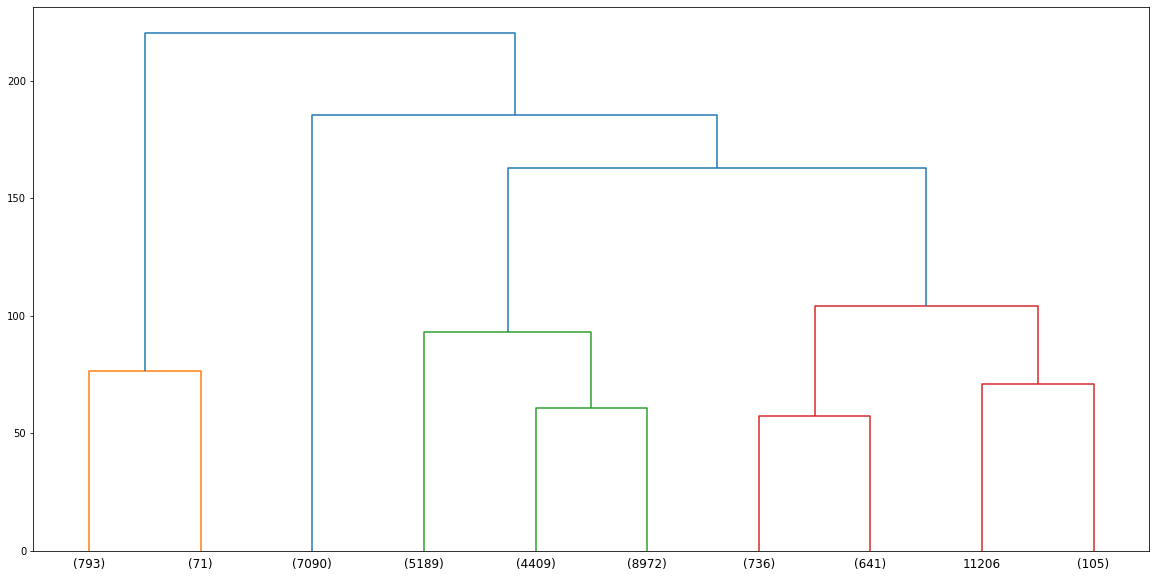

In [26]:
# On fait le dendograme

liste = ['recency','frequency','monetary']

standard = StandardScaler()
standard.fit(data[liste].dropna())

X_original = data[liste].dropna()

X_100 = pd.DataFrame(standard.transform(data[liste].dropna()),columns=data[liste].dropna().columns)

X_original_3 = X_original.sample(frac=0.3,random_state=0)

X = standard.transform(X_original_3)

plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method='ward'),p=10, truncate_mode="lastp")
plt.show()

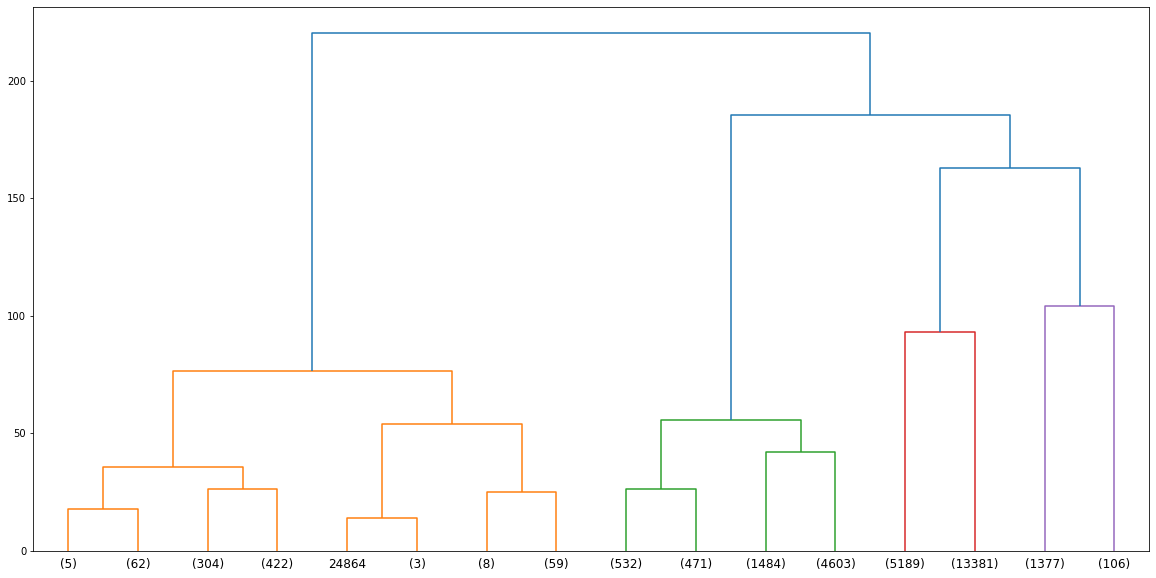

In [27]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method='ward'),p=3, truncate_mode="level")
plt.show()

In [28]:
# A nouveau on a 4 cluster

cah = AgglomerativeClustering(n_clusters=4, linkage="ward")

cah.fit(X)

AgglomerativeClustering(n_clusters=4)

In [29]:
np.unique(cah.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([ 1483, 18570,  7090,   864], dtype=int64))

In [30]:
# On compare avec K_means

K_predict = KMeans(n_clusters=4, random_state=0).fit_predict(X)
np.unique(K_predict,return_counts=True)

(array([0, 1, 2, 3]), array([15324,   742,   857, 11084], dtype=int64))

In [31]:
adjusted_rand_score(K_predict,cah.labels_)

0.49638526034135827

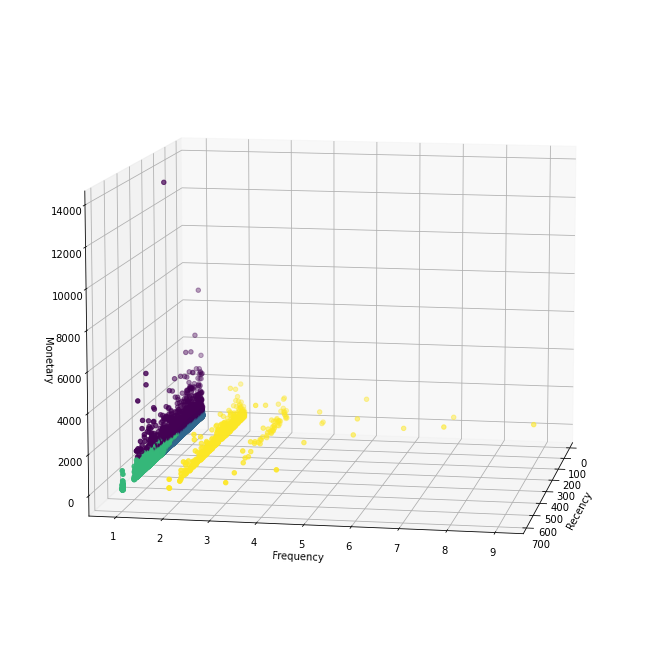

In [32]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=10, azim=10)

ax.scatter(X_original_3['recency'],X_original_3['frequency'],X_original_3['monetary'],c=cah.labels_);

In [33]:
X_original_3['label'] = cah.labels_

for i in np.sort(X_original_3['label'].unique()):
    print(f'Feature {i}')
    print(X_original_3[X_original_3['label']==i][liste].mean(),'\n')

Feature 0
recency      171.420094
frequency      1.000000
monetary     815.673425
dtype: float64 

Feature 1
recency      164.942165
frequency      1.000000
monetary     113.227628
dtype: float64 

Feature 2
recency      441.622003
frequency      1.000000
monetary     153.698035
dtype: float64 

Feature 3
recency      212.482639
frequency      2.116898
monetary     309.170995
dtype: float64 



In [34]:
X_original_3['label_1'] = K_predict

for i in np.sort(X_original_3['label_1'].unique()):
    print(f'Feature {i}')
    print(X_original_3[X_original_3['label_1']==i][liste].mean(),'\n')

Feature 0
recency      128.457061
frequency      1.000000
monetary     134.063705
dtype: float64 

Feature 1
recency       236.649596
frequency       1.009434
monetary     1171.884367
dtype: float64 

Feature 2
recency      212.429405
frequency      2.117853
monetary     297.290210
dtype: float64 

Feature 3
recency      388.465807
frequency      1.000000
monetary     134.465484
dtype: float64 



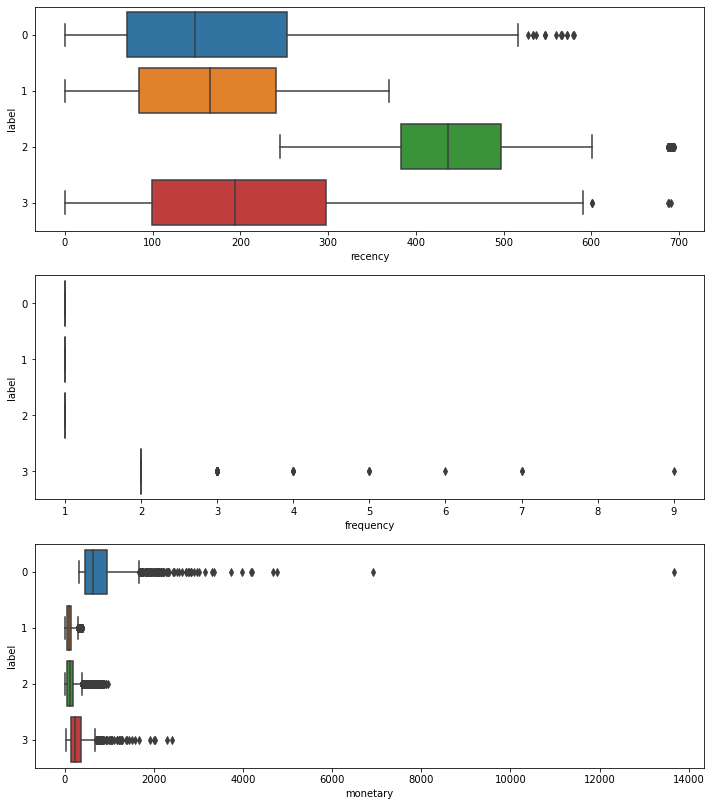

In [35]:
fig, axs = plt.subplots(len(liste), 1, figsize=(12,14))

j=0

for i in liste:
    #axs[j].set_title(i)
    sns.boxplot(x=X_original_3[i],y=X_original_3['label'],orient='h',ax=axs[j])
    j+=1

# DBSCAN

Text(0, 0.5, 'Distance')

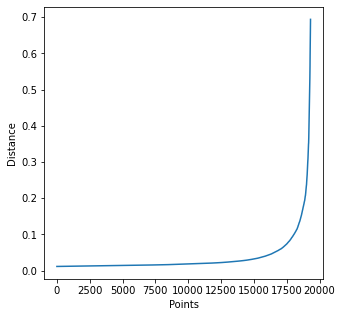

In [36]:
# On utilise le nearest neighbor pour calculer le bon eps

X = data[liste].dropna().sample(frac=0.3)

st = StandardScaler()
X_rfm = pd.DataFrame(st.fit_transform(X), columns=X.columns)

nearest_neighbors = NearestNeighbors(n_neighbors=13)
neighbors = nearest_neighbors.fit(X_rfm)

distances, indices = neighbors.kneighbors(X_rfm)
mean_distances = np.mean(distances, axis=1)
mean_distances = np.sort(mean_distances)


fig = plt.figure(figsize=(5, 5))
plt.plot(mean_distances[8600:-100])
plt.xlabel("Points")
plt.ylabel("Distance")

In [37]:
clustering = DBSCAN(eps=0.1).fit(X)

In [38]:
print('Repartition :')
print(np.array(np.unique(clustering.labels_,return_counts=True)))
print('Pourcentage :')
print((np.array(np.unique(clustering.labels_,return_counts=True))[1]/len(X)*100).round(1))

# De toute evidence, le DBSCAN n'est pas du tout adapté a notre problème (c'était prévisible)

Repartition :
[[   -1     0     1     2     3     4     5     6]
 [27963     6     5     5     5     8     8     7]]
Pourcentage :
[99.8  0.   0.   0.   0.   0.   0.   0. ]


In [39]:
adjusted_rand_score(K_predict,clustering.labels_)

-0.0002618494465470172

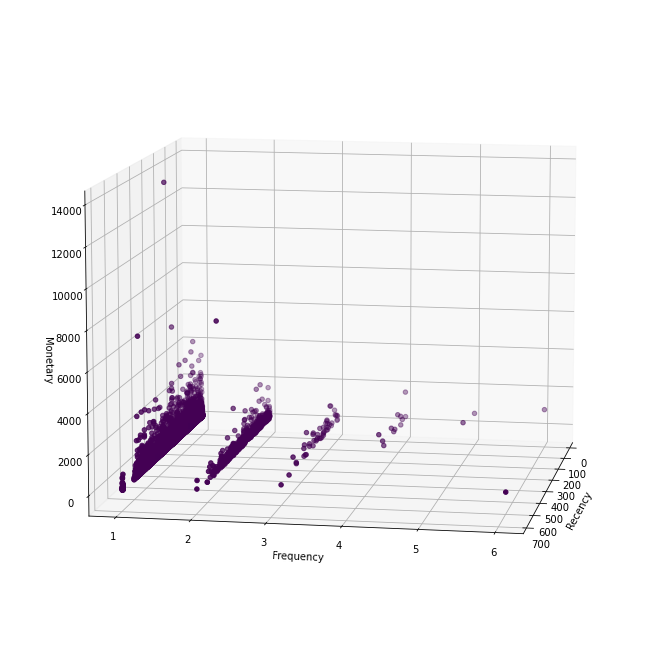

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=10, azim=10)

ax.scatter(X['recency'],X['frequency'],X['monetary'],c=clustering.labels_);